In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'comfort-study'))
os.getcwd()

'/home/tkokkeng/Documents/comfort-study'

In [3]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/comfort-study',
 '/home/tkokkeng/Documents/comfort-study/source',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python36.zip',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/site-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

In [4]:
# all_data = pd.read_excel(io=os.path.join('data', 'data.xlsx'), sheet_name=list(range(1, 11)), header=None)
all_data = pd.read_excel(io=os.path.join('data', 'data_cleaned.xlsx'), sheet_name=None, header=None)

In [5]:
type(all_data)

collections.OrderedDict

In [6]:
all_data.keys()

odict_keys(['第 1 张表单回复', 'Lower zone', 'lower + a', 'lower + b', 'lower+c', 'lower + d', 'upper zone', 'upper +a', 'upper+b', 'upper+c', 'upper + d'])

In [7]:
all_data['Lower zone'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 20 columns):
0     78 non-null datetime64[ns]
1     78 non-null object
2     78 non-null object
3     78 non-null object
4     77 non-null object
5     78 non-null object
6     78 non-null object
7     78 non-null object
8     78 non-null object
9     78 non-null object
10    78 non-null object
11    77 non-null object
12    78 non-null object
13    78 non-null object
14    78 non-null object
15    78 non-null object
16    77 non-null object
17    78 non-null object
18    78 non-null object
19    78 non-null object
dtypes: datetime64[ns](1), object(19)
memory usage: 12.3+ KB


In [8]:
all_data['第 1 张表单回复'].iloc[0, :]

0                                                  时间戳记
1                         Which Zone are you sitting in
2                                  What is your gender?
3                          What is your clothing like? 
4     Do you feel you have adequate rest/sleep the p...
5           Indoor environment perception [Temperature]
6                                      ` [Air movement]
7                                       ` [Air Quality]
8       Indoor Environmental Satisfaction [Temperature]
9      Indoor Environmental Satisfaction [Air movement]
10      Indoor Environmental Satisfaction [Air quality]
11          Indoor Environmental Satisfaction [Overall]
12    How much do you experience the following [Head...
13    How much do you experience the following [Diff...
14    How much do you experience the following [Dry ...
15    How much do you experience the following [Slee...
16    How much do you experience the following [Eye ...
17    How much do you experience the following [

In [9]:
survey_titles = all_data['第 1 张表单回复'].iloc[0, 5:].tolist()
survey_titles

['Indoor environment perception [Temperature]',
 '` [Air movement]',
 '` [Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [Sneezing/Coughing]']

In [10]:
len(survey_titles)

15

In [11]:
survey_titles = list(map(lambda x: re.sub(r'[`/]', '', x), survey_titles))
survey_titles = list(map(lambda x: re.sub(r'^ +', '', x), survey_titles))
survey_titles

['Indoor environment perception [Temperature]',
 '[Air movement]',
 '[Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [SneezingCoughing]']

In [12]:
zones = list(all_data.keys())
zones

['第 1 张表单回复',
 'Lower zone',
 'lower + a',
 'lower + b',
 'lower+c',
 'lower + d',
 'upper zone',
 'upper +a',
 'upper+b',
 'upper+c',
 'upper + d']

In [13]:
del zones[0]
zones

['Lower zone',
 'lower + a',
 'lower + b',
 'lower+c',
 'lower + d',
 'upper zone',
 'upper +a',
 'upper+b',
 'upper+c',
 'upper + d']

In [14]:
zones[0]

'Lower zone'

In [15]:
all_data[zones[0]].iloc[:5, :10]

,0,1,2,3,4,5,6,7,8,9
0,2019-01-18 17:10:46.523,Zone 1,Male,A,Too little,Cold,Far too strong,Very smell/stale,Somewhat dissatisfied,Neutral
1,2019-01-22 13:16:09.528,Zone 2,Female,A,Just sufficient,Just comfortable,Just nice,Just acceptable,Somewhat dissatisfied,Neutral
2,2019-01-22 13:16:26.069,Zone 1,Female,A,Just sufficient,Just comfortable,Just nice,A little smelly/stale,Somewhat satisfied,Somewhat satisfied
3,2019-01-22 13:16:44.703,Zone 1,Male,A,Just sufficient,A little warm,A little weak,A little smelly/stale,Somewhat dissatisfied,Somewhat dissatisfied
4,2019-01-22 13:16:55.189,Zone 1,Female,A,Just sufficient,Slightly cool,Just nice,Fresh,Satisfied,Satisfied


In [16]:
all_data[zones[0]].iloc[:, 5]

0                 Cold
1     Just comfortable
2     Just comfortable
3        A little warm
4        Slightly cool
5     Just comfortable
6     Just comfortable
7     Just comfortable
8        A little warm
9     Just comfortable
10    Just comfortable
11       A little warm
12    Just comfortable
13       A little warm
14       A little warm
15    Just comfortable
16       A little warm
17       A little warm
18       A little warm
19                Warm
20       A little warm
21       A little warm
22    Just comfortable
23                Warm
24       Slightly cool
25                Cool
26       Slightly cool
27       A little warm
28       A little warm
29                Warm
            ...       
48    Just comfortable
49    Just comfortable
50       Slightly cool
51       A little warm
52                Warm
53    Just comfortable
54                Warm
55       A little warm
56    Just comfortable
57    Just comfortable
58    Just comfortable
59       A little warm
60    Just 

In [17]:
all_data[zones[0]].iloc[:, 5].value_counts().sort_index()

A little warm       34
Cold                 1
Cool                 1
Hot                  1
Just comfortable    24
Slightly cool        7
Warm                10
Name: 5, dtype: int64

In [18]:
all_data[zones[0]].iloc[:, 5].value_counts().sort_index().index.tolist()

['A little warm',
 'Cold',
 'Cool',
 'Hot',
 'Just comfortable',
 'Slightly cool',
 'Warm']

In [19]:
all_data[zones[0]].iloc[:, 5].value_counts().sum()

78

Matplotlib assigns colors consecutively from a colormap to each label in sequence; to get the same color mapping to each class across plots, the classes must be arranged in the same order. Classes which do not appear in a dataset needs to be added into count data with count zero to preserve the color mapping.

([<matplotlib.patches.Wedge at 0x7fb613d304e0>,
 [Text(0.22002825021671504, 1.0777697198875884, 'A little warm'),
  Text(-1.028517876523044, 0.39006535051517766, 'Cold'),
  Text(-1.0565699306236995, 0.3060391832785977, 'Cool'),
  Text(-1.0777697231064214, 0.22002823444982705, 'Hot'),
  Text(-0.7619967387479085, -0.7933227402120475, 'Just comfortable'),
  Text(0.5111955922782591, -0.974001574144149, 'Slightly cool'),
  Text(1.0119774463130713, -0.43116313403823764, 'Warm')])

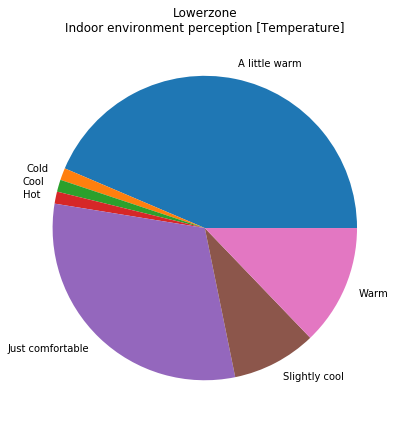

In [20]:
plt.figure(figsize=(7,7))
plt.title(zones[0].replace(' ', '') + '\n' + survey_titles[0])
plt.pie(all_data[zones[0]].iloc[:, 5].value_counts().sort_index(), labels=all_data[zones[0]].iloc[:, 5].value_counts().sort_index().index.tolist())

In [21]:
all_data[zones[1]].iloc[:, 5].value_counts().sort_index()

A little warm       24
Cold                 1
Cool                 1
Just comfortable    19
Slightly cool        5
Warm                 5
Name: 5, dtype: int64

'Hot' is not in the count data.

In [22]:
series = all_data[zones[1]].iloc[:, 5].value_counts()
series['Hot'] = 0
series.sort_index(inplace=True)
series

A little warm       24
Cold                 1
Cool                 1
Hot                  0
Just comfortable    19
Slightly cool        5
Warm                 5
Name: 5, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb613c40160>,
 [Text(0.2184495096398421, 1.078090817945368, 'A little warm'),
  Text(-1.036028801851941, 0.3696543273562907, 'Cold'),
  Text(-1.071413108981167, 0.24914644268644534, 'Cool'),
  Text(-1.0838892193526353, 0.18757441235716366, 'Hot'),
  Text(-0.6717126724182926, -0.8710924667982588, 'Just comfortable'),
  Text(0.7203468055708542, -0.8313245333224963, 'Slightly cool'),
  Text(1.0554422755920456, -0.30990579680458497, 'Warm')],
 [Text(0.11915427798536841, 0.5880495370611099, '43%'),
  Text(-0.5651066191919678, 0.20162963310343127, '1%'),
  Text(-0.5844071503533638, 0.135898059647152, '1%'),
  Text(-0.5912123014650736, 0.10231331583118017, ''),
  Text(-0.36638873040997777, -0.4751413455263229, '34%'),
  Text(0.3929164394022841, -0.45344974544863426, '9%'),
  Text(0.5756957866865703, -0.16903952552977358, '9%')])

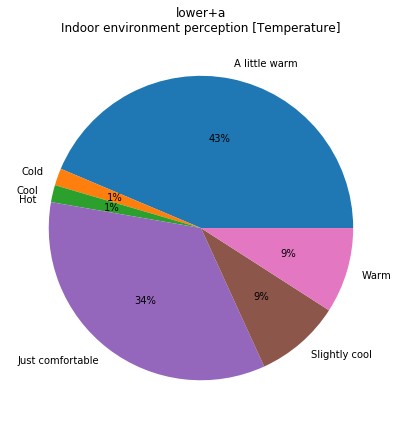

In [31]:
total_cnt = series.sum()
plt.figure(figsize=(7,7))
plt.title(zones[1].replace(' ', '') + '\n' + survey_titles[0])
# plt.pie(series, labels=series.index.tolist(), autopct='%1.1f%%')
# plt.pie(series, labels=series.index.tolist(), autopct=lambda x: str(int(x * 100 / total_cnt)) + '%' if x > 0 else '')
plt.pie(series, labels=series.index.tolist(), autopct=lambda x: str(int(x)) + '%' if x > 0 else '')

In [24]:
all_data['第 1 张表单回复'].iloc[:3, 5:10]

,5,6,7,8,9
0,Indoor environment perception [Temperature],` [Air movement],` [Air Quality],Indoor Environmental Satisfaction [Temperature],Indoor Environmental Satisfaction [Air movement]
1,4,2,3,NaN,NaN
2,Cold,Far too strong,Very smell/stale,Somewhat dissatisfied,Neutral


In [25]:
len(all_data['第 1 张表单回复'].iloc[2:, :])

138

## Check data

In [26]:
for i in range(15):
    print(i, (all_data['Lower zone'].iloc[:, 5+i] == all_data['upper zone'].iloc[:, 5+i]).all())

0 True
1 True
2 True
3 True
4 True
5 True
6 False
7 True
8 True
9 True
10 True
11 False
12 True
13 True
14 True


In [27]:
all_data['Lower zone'].loc[(all_data['Lower zone'].iloc[:, 11] != all_data['upper zone'].iloc[:, 11]), 11]

72    NaN
Name: 11, dtype: object

In [28]:
all_data['upper zone'].loc[(all_data['Lower zone'].iloc[:, 11] != all_data['upper zone'].iloc[:, 11]), 11]

72    NaN
Name: 11, dtype: object

In [29]:
all_data['Lower zone'].iloc[70:75, 8:15]

,8,9,10,11,12,13,14
70,Neutral,Neutral,Neutral,Neutral,Not at all,Moderate,A little
71,Somewhat dissatisfied,Very dissatisfied,Somewhat dissatisfied,Dissatisfied,A little,Intense,Not at all
72,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,NaN,Not at all,Moderate,Not at all
73,Somewhat dissatisfied,Neutral,Neutral,Neutral,Not at all,Not at all,Not at all
74,Neutral,Neutral,Neutral,Neutral,A little,Not at all,Not at all
